Considere el dataset de diagnóstico de cancer de mama de la Universidad de Wisconsin

In [1]:
%%bash
wget -nc -c https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data
wget -nc -c https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.names

El fichero “wdbc.data” ya está ahí, no se recupera.

El fichero “wdbc.names” ya está ahí, no se recupera.



In [2]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt

%matplotlib notebook 

print("Versión de pandas "+ pd.__version__)

Versión de pandas 0.24.2


La siguiente celda contiene código para esconder $\textbf{"code cells"}$, seleccione $\textbf{"Mostrar/Esconder código"}$ para mostrar. 

In [3]:
from IPython.display import HTML
import random

def hide_toggle(for_next=False):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'

    toggle_text = 'Mostrar/Esconder código'  # text shown on toggle link
    target_cell = this_cell  # target cell to control with toggle
    js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

    if for_next:
        target_cell = next_cell
        toggle_text += ' next cell'
        js_hide_current = this_cell + '.find("div.input").hide();'

    js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))

    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
            }}

            {js_hide_current}
        </script>

        <a href="javascript:{f_name}()">{toggle_text}</a>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current, 
        toggle_text=toggle_text
    )
    return HTML(html)

hide_toggle()

#### Lea el *readme* y describa el dataset en términos cualitativos 



El dataset fue desarrollado en University od Wisconsin-Madison, por el prof. Olvi L. Mangasarian del depatramento de Computer Science y Dr. William H. Wolberg del departamento de Cirugía y Oncología Humana. Su fin es diagnosticar y pronosticar cancer de pecho.

#### Importe el dataset usando `numpy` o `pandas`

In [4]:
df = pd.read_csv("wdbc.data", header=None)
columns = pd.MultiIndex.from_product([['mean', 'standard error', 'worst'], 
                                      ["radius", "texture", "perimeter", "area", "smothness",
                                       "compactness", "cancavity", "concave points", "symmetry",
                                       "fractal dimension"]])
df = df.rename(index=str, columns={0: "ID number", 1: "Diagnosis"})
df = df.set_index(['ID number', 'Diagnosis'])
df.columns = columns
df.reset_index(inplace=True)  
df.head(10)

ID number Diagnosis   mean                                                  \
                      radius texture perimeter    area smothness compactness   
0    842302         M  17.99   10.38    122.80  1001.0   0.11840     0.27760   
1    842517         M  20.57   17.77    132.90  1326.0   0.08474     0.07864   
2  84300903         M  19.69   21.25    130.00  1203.0   0.10960     0.15990   
3  84348301         M  11.42   20.38     77.58   386.1   0.14250     0.28390   
4  84358402         M  20.29   14.34    135.10  1297.0   0.10030     0.13280   
5    843786         M  12.45   15.70     82.57   477.1   0.12780     0.17000   
6    844359         M  18.25   19.98    119.60  1040.0   0.09463     0.10900   
7  84458202         M  13.71   20.83     90.20   577.9   0.11890     0.16450   
8    844981         M  13.00   21.82     87.50   519.8   0.12730     0.19320   
9  84501001         M  12.46   24.04     83.97   475.9   0.11860     0.23960   

                            ...  worst                                      \
  cancavity concave points  ... radius texture perimeter    area smothness   
0   0.30010        0.14710  ...  25.38   17.33    184.60  2019.0    0.1622   
1   0.08690        0.07017  ...  24.99   23.41    158.80  1956.0    0.1238   
2   0.19740        0.12790  ...  23.57   25.53    152.50  1709.0    0.1444   
3   0.24140        0.10520  ...  14.91   26.50     98.87   567.7    0.2098   
4   0.19800        0.10430  ...  22.54   16.67    152.20  1575.0    0.1374   
5   0.15780        0.08089  ...  15.47   23.75    103.40   741.6    0.1791   
6   0.11270        0.07400  ...  22.88   27.66    153.20  1606.0    0.1442   
7   0.09366        0.05985  ...  17.06   28.14    110.60   897.0    0.1654   
8   0.18590        0.09353  ...  15.49   30.73    106.20   739.3    0.1703   
9   0.22730        0.08543  ...  15.09   40.68     97.65   711.4    0.1853   

                                                                   
  compactness cancavity concave points symmetry fractal dimension  
0      0.6656    0.7119         0.2654   0.4601           0.11890  
1      0.1866    0.2416         0.1860   0.2750           0.08902  
2      0.4245    0.4504         0.2430   0.3613           0.08758  
3      0.8663    0.6869         0.2575   0.6638           0.17300  
4      0.2050    0.4000         0.1625   0.2364           0.07678  
5      0.5249    0.5355         0.1741   0.3985           0.12440  
6      0.2576    0.3784         0.1932   0.3063           0.08368  
7      0.3682    0.2678         0.1556   0.3196           0.11510  
8      0.5401    0.5390         0.2060   0.4378           0.10720  
9      1.0580    1.1050         0.2210   0.4366           0.20750  

[10 rows x 32 columns]

#### 1.- Caracterice estadísticamente cada uno de los atributos
1. Calcule la media, varianza, simetría y curtosis para cada atributo usando (a) todos los datos y (b) por separado para tumores benignos y malignos. Explique el significado de los valores obtenidos. ¿Cuales atributos se acomodan a una normal?
1. Visualice la distribución empírica de cada atributo con `matplotlib` usando (a) todos los datos y (b) por separado para tumores benignos y malignos. ¿Qué tipo de distribución sería apropiada para ajustar cada atributo? ¿Puede diferenciar el tipo de tumor usando los atributos de forma aislada?

### Respuesta 1.1 
#### (a) Análisis de datos generales (Media, Varianza, Simetría y Curtosis)

In [5]:
# Media
mean_1 = df["mean"].mean()
mean_2 = df["standard error"].mean()
mean_3 = df["worst"].mean()
print('Media de: \n\n',
      'Mean: \n',mean_1, '\n\n',
      'Standard error: \n',mean_2, '\n\n',
      'Worst: \n',mean_3, '\n\n')

# Varianza
variance_1 = df["mean"].var()
variance_2 = df["standard error"].var()
variance_3 = df["worst"].var()
print('Varianza de: \n\n',
      'Mean: \n',variance_1, '\n\n',
      'Standard error: \n',variance_2, '\n\n',
      'Worst: \n',variance_3, '\n\n')

# Simetría
symmetry_1 = df["mean"].skew()
symmetry_2 = df["standard error"].skew()
symmetry_3 = df["worst"].skew()
print('Simetría de: \n\n',
      'Mean: \n',symmetry_1, '\n\n',
      'Standard error: \n',symmetry_2, '\n\n',
      'Worst: \n',symmetry_3, '\n\n')

# Curtosis
kurtosis_1 = df["mean"].kurtosis()
kurtosis_2 = df["standard error"].kurtosis()
kurtosis_3 = df["worst"].kurtosis()
print('Curtosis de: \n\n',
      'Mean: \n',kurtosis_1, '\n\n',
      'Standard error: \n',kurtosis_2, '\n\n',
      'Worst: \n',kurtosis_3)

hide_toggle()

Media de: 

 Mean: 
 radius                14.127292
texture               19.289649
perimeter             91.969033
area                 654.889104
smothness              0.096360
compactness            0.104341
cancavity              0.088799
concave points         0.048919
symmetry               0.181162
fractal dimension      0.062798
dtype: float64 

 Standard error: 
 radius                0.405172
texture               1.216853
perimeter             2.866059
area                 40.337079
smothness             0.007041
compactness           0.025478
cancavity             0.031894
concave points        0.011796
symmetry              0.020542
fractal dimension     0.003795
dtype: float64 

 Worst: 
 radius                16.269190
texture               25.677223
perimeter            107.261213
area                 880.583128
smothness              0.132369
compactness            0.254265
cancavity              0.272188
concave points         0.114606
symmetry               0.29007

#### (b) Datos de diagnósticos MALIGNOS

In [6]:
df_m = df[df.Diagnosis == 'M']
df_m = df_m.reset_index()
#display(df_m)

# Media
mean_m_1 = df_m["mean"].mean()
mean_m_2 = df_m["standard error"].mean()
mean_m_3 = df_m["worst"].mean()
print('Media de: \n\n',
      'Mean: \n',mean_m_1, '\n\n',
      'Standard error: \n',mean_m_2, '\n\n',
      'Worst: \n',mean_m_3, '\n\n')

# Varianza
variance_m_1 = df_m["mean"].var()
variance_m_2 = df_m["standard error"].var()
variance_m_3 = df_m["worst"].var()
print('Varianza de: \n\n',
      'Mean: \n',variance_m_1, '\n\n',
      'Standard error: \n',variance_m_2, '\n\n',
      'Worst: \n',variance_m_3, '\n\n')

# Simetría
symmetry_m_1 = df_m["mean"].skew()
symmetry_m_2 = df_m["standard error"].skew()
symmetry_m_3 = df_m["worst"].skew()
print('Simetría de: \n\n',
      'Mean: \n',symmetry_m_1, '\n\n',
      'Standard error: \n',symmetry_m_2, '\n\n',
      'Worst: \n',symmetry_m_3, '\n\n')

# Curtosis
kurtosis_m_1 = df_m["mean"].kurtosis()
kurtosis_m_2 = df_m["standard error"].kurtosis()
kurtosis_m_3 = df_m["worst"].kurtosis()
print('Curtosis de: \n\n',
      'Mean: \n',kurtosis_m_1, '\n\n',
      'Standard error: \n',kurtosis_m_2, '\n\n',
      'Worst: \n',kurtosis_m_3)

Media de: 

 Mean: 
 radius                17.462830
texture               21.604906
perimeter            115.365377
area                 978.376415
smothness              0.102898
compactness            0.145188
cancavity              0.160775
concave points         0.087990
symmetry               0.192909
fractal dimension      0.062680
dtype: float64 

 Standard error: 
 radius                0.609083
texture               1.210915
perimeter             4.323929
area                 72.672406
smothness             0.006780
compactness           0.032281
cancavity             0.041824
concave points        0.015060
symmetry              0.020472
fractal dimension     0.004062
dtype: float64 

 Worst: 
 radius                 21.134811
texture                29.318208
perimeter             141.370330
area                 1422.286321
smothness               0.144845
compactness             0.374824
cancavity               0.450606
concave points          0.182237
symmetry              

#### (b) Datos de diagnósticos BENIGNOS

In [7]:
df_b = df[df.Diagnosis == 'B']
df_b = df_b.reset_index()
#display(df_b)

# Media
mean_b_1 = df_b["mean"].mean()
mean_b_2 = df_b["standard error"].mean()
mean_b_3 = df_b["worst"].mean()
print('Media de: \n\n',
      'Mean: \n',mean_b_1, '\n\n',
      'Standard error: \n',mean_b_2, '\n\n',
      'Worst: \n',mean_b_3, '\n\n')

# Varianza
variance_b_1 = df_b["mean"].var()
variance_b_2 = df_b["standard error"].var()
variance_b_3 = df_b["worst"].var()
print('Varianza de: \n\n',
      'Mean: \n',variance_b_1, '\n\n',
      'Standard error: \n',variance_b_2, '\n\n',
      'Worst: \n',variance_b_3, '\n\n')

# Simetría
symmetry_b_1 = df_b["mean"].skew()
symmetry_b_2 = df_b["standard error"].skew()
symmetry_b_3 = df_b["worst"].skew()
print('Simetría de: \n\n',
      'Mean: \n',symmetry_b_1, '\n\n',
      'Standard error: \n',symmetry_b_2, '\n\n',
      'Worst: \n',symmetry_b_3, '\n\n')

# Curtosis
kurtosis_b_1 = df_b["mean"].kurtosis()
kurtosis_b_2 = df_b["standard error"].kurtosis()
kurtosis_b_3 = df_b["worst"].kurtosis()
print('Curtosis de: \n\n',
      'Mean: \n',kurtosis_b_1, '\n\n',
      'Standard error: \n',kurtosis_b_2, '\n\n',
      'Worst: \n',kurtosis_b_3)

Media de: 

 Mean: 
 radius                12.146524
texture               17.914762
perimeter             78.075406
area                 462.790196
smothness              0.092478
compactness            0.080085
cancavity              0.046058
concave points         0.025717
symmetry               0.174186
fractal dimension      0.062867
dtype: float64 

 Standard error: 
 radius                0.284082
texture               1.220380
perimeter             2.000321
area                 21.135148
smothness             0.007196
compactness           0.021438
cancavity             0.025997
concave points        0.009858
symmetry              0.020584
fractal dimension     0.003636
dtype: float64 

 Worst: 
 radius                13.379801
texture               23.515070
perimeter             87.005938
area                 558.899440
smothness              0.124959
compactness            0.182673
cancavity              0.166238
concave points         0.074444
symmetry               0.27024

#### Analisis de datos:
- La media encontrada simplemente podemos explciarla como la el valor obtenido al sumar los N valores de la muestra y luego estos son divididos por N, es decir el promedio, está en la forma normal, esto es calculado respecto a los valores correspondientes a mean, standard error y worst.
- La varianza la comprendemos como la disperción de los datos en torno al valor medio de la muestra.
- Identificamos la simetría como el grado en que los datos son simétricos. 
- Curtosis indica la manera en como las colas de la distribución no se parecen a la distribución normal, es decir, una curtosis positiva indica que la distribución tiene "colas pesadas", mientras que la curtosis negativa las colas son ligeras, no generandose así una caída rápida de estas. 

### Respuesta 1.2 a), b)

#### Comparativa entre datos generales, tumores benignos y tumores malignos

In [8]:
def update_plot(atrib_clase, atributo):
    
    fig, ax = plt.subplots(1, 3, figsize=(8, 3), tight_layout=True, sharey=True)
    
    ax[0].hist(df[atrib_clase][atributo])
    ax[1].hist(df_b[atrib_clase][atributo])
    ax[2].hist(df_m[atrib_clase][atributo])
    
    ax[0].set_title("Tumores Generales")
    ax[1].set_title("Tumores Benignos")
    ax[2].set_title("Tumores Malignos")

    ax[0].set_xlabel(atributo)
    ax[1].set_xlabel(atributo)
    ax[2].set_xlabel(atributo)

    plt.show()
        
        
atrib_clase = widgets.ToggleButtons(
    options=["mean", "standard error","worst"],
    value="mean",
    description='Clase dato: ',
    sidable=False
)

atributo = widgets.Dropdown(
    options=["radius", "texture", "perimeter", "area", 
             "smothness", "compactness", "cancavity", 
             "concave points", "symmetry", "fractal dimension"],
    value= "radius",
    description='Atributo: ',
    sidable=False
)
                
widgets.interact(update_plot, atributo=atributo, atrib_clase=atrib_clase)

hide_toggle()

interactive(children=(ToggleButtons(description='Clase dato: ', options=('mean', 'standard error', 'worst'), v…

#### Proporción entre casos de tumores benignos y malignos

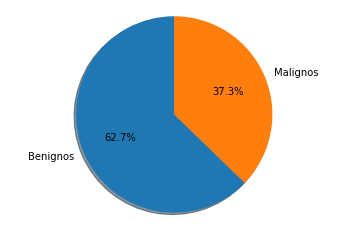

In [9]:
labels = 'Benignos', 'Malignos'
sizes = [len(df_b),len(df_m)]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  

plt.show()

hide_toggle()

Al observar los gráficos generados anteriormente podemos identificar que todos poseen una distribución similar a la normal, pero con una tendencia hacia la izquierda, es decir, una asimetría negativa. 

La celta a continuación (escondida) contiene las combinaciones de data (Todos, Malignos y Benignos).

In [11]:
# Todos los datos
radius_m_w = df['mean']['radius'],df['worst']['radius']
radius_w_s = df['worst']['radius'],df['standard error']['radius']
radius_s_m = df['standard error']['radius'],df['mean']['radius']

texture_m_w = df['mean']['texture'],df['worst']['texture']
texture_w_s = df['worst']['texture'],df['standard error']['texture']
texture_s_m = df['standard error']['texture'],df['mean']['texture']

perimeter_m_w = df['mean']['perimeter'],df['worst']['perimeter']
perimeter_w_s = df['worst']['perimeter'],df['standard error']['perimeter']
perimeter_s_m = df['standard error']['perimeter'],df['mean']['perimeter']

area_m_w = df['mean']['area'],df['worst']['area']
area_w_s = df['worst']['area'],df['standard error']['area']
area_s_m = df['standard error']['area'],df['mean']['area']

smothness_m_w = df['mean']['smothness'],df['worst']['smothness']
smothness_w_s = df['worst']['smothness'],df['standard error']['smothness']
smothness_s_m = df['standard error']['smothness'],df['mean']['smothness']

compactness_m_w = df['mean']['compactness'],df['worst']['compactness']
compactness_w_s = df['worst']['compactness'],df['standard error']['compactness']
compactness_s_m = df['standard error']['compactness'],df['mean']['compactness']

cancavity_m_w = df['mean']['cancavity'],df['worst']['cancavity']
cancavity_w_s = df['worst']['cancavity'],df['standard error']['cancavity']
cancavity_s_m = df['standard error']['cancavity'],df['mean']['cancavity']

concave_points_m_w = df['mean']['concave points'],df['worst']['concave points']
concave_points_w_s = df['worst']['concave points'],df['standard error']['concave points']
concave_points_s_m = df['standard error']['concave points'],df['mean']['concave points']

symmetry_m_w = df['mean']['symmetry'],df['worst']['symmetry']
symmetry_w_s = df['worst']['symmetry'],df['standard error']['symmetry']
symmetry_s_m = df['standard error']['symmetry'],df['mean']['symmetry']

fractal_dimension_m_w = df['mean']['fractal dimension'],df['worst']['fractal dimension']
fractal_dimension_w_s = df['worst']['fractal dimension'],df['standard error']['fractal dimension']
fractal_dimension_s_m = df['standard error']['fractal dimension'],df['mean']['fractal dimension']

# Malignos

radius_m_m_w = df_m['mean']['radius'],df_m['worst']['radius']
radius_m_w_s = df_m['worst']['radius'],df_m['standard error']['radius']
radius_m_s_m = df_m['standard error']['radius'],df_m['mean']['radius']

texture_m_m_w = df_m['mean']['texture'],df_m['worst']['texture']
texture_m_w_s = df_m['worst']['texture'],df_m['standard error']['texture']
texture_m_s_m = df_m['standard error']['texture'],df_m['mean']['texture']

perimeter_m_m_w = df_m['mean']['perimeter'],df_m['worst']['perimeter']
perimeter_m_w_s = df_m['worst']['perimeter'],df_m['standard error']['perimeter']
perimeter_m_s_m = df_m['standard error']['perimeter'],df_m['mean']['perimeter']

area_m_m_w = df_m['mean']['area'],df_m['worst']['area']
area_m_w_s = df_m['worst']['area'],df_m['standard error']['area']
area_m_s_m = df_m['standard error']['area'],df_m['mean']['area']

smothness_m_m_w = df_m['mean']['smothness'],df_m['worst']['smothness']
smothness_m_w_s = df_m['worst']['smothness'],df_m['standard error']['smothness']
smothness_m_s_m = df_m['standard error']['smothness'],df_m['mean']['smothness']

compactness_m_m_w = df_m['mean']['compactness'],df_m['worst']['compactness']
compactness_m_w_s = df_m['worst']['compactness'],df_m['standard error']['compactness']
compactness_m_s_m = df_m['standard error']['compactness'],df_m['mean']['compactness']

cancavity_m_m_w = df_m['mean']['cancavity'],df_m['worst']['cancavity']
cancavity_m_w_s = df_m['worst']['cancavity'],df_m['standard error']['cancavity']
cancavity_m_s_m = df_m['standard error']['cancavity'],df_m['mean']['cancavity']

concave_points_m_m_w = df_m['mean']['concave points'],df_m['worst']['concave points']
concave_points_m_w_s = df_m['worst']['concave points'],df_m['standard error']['concave points']
concave_points_m_s_m = df_m['standard error']['concave points'],df_m['mean']['concave points']

symmetry_m_m_w = df_m['mean']['symmetry'],df_m['worst']['symmetry']
symmetry_m_w_s = df_m['worst']['symmetry'],df_m['standard error']['symmetry']
symmetry_m_s_m = df_m['standard error']['symmetry'],df_m['mean']['symmetry']

fractal_dimension_m_m_w = df_m['mean']['fractal dimension'],df_m['worst']['fractal dimension']
fractal_dimension_m_w_s = df_m['worst']['fractal dimension'],df_m['standard error']['fractal dimension']
fractal_dimension_m_s_m = df_m['standard error']['fractal dimension'],df_m['mean']['fractal dimension']

# Benignos

radius_b_m_w = df_b['mean']['radius'],df_b['worst']['radius']
radius_b_w_s = df_b['worst']['radius'],df_b['standard error']['radius']
radius_b_s_m = df_b['standard error']['radius'],df_b['mean']['radius']

texture_b_m_w = df_b['mean']['texture'],df_b['worst']['texture']
texture_b_w_s = df_b['worst']['texture'],df_b['standard error']['texture']
texture_b_s_m = df_b['standard error']['texture'],df_b['mean']['texture']

perimeter_b_m_w = df_b['mean']['perimeter'],df_b['worst']['perimeter']
perimeter_b_w_s = df_b['worst']['perimeter'],df_b['standard error']['perimeter']
perimeter_b_s_m = df_b['standard error']['perimeter'],df_b['mean']['perimeter']

area_b_m_w = df_b['mean']['area'],df_b['worst']['area']
area_b_w_s = df_b['worst']['area'],df_b['standard error']['area']
area_b_s_m = df_b['standard error']['area'],df_b['mean']['area']

smothness_b_m_w = df_b['mean']['smothness'],df_b['worst']['smothness']
smothness_b_w_s = df_b['worst']['smothness'],df_b['standard error']['smothness']
smothness_b_s_m = df_b['standard error']['smothness'],df_b['mean']['smothness']

compactness_b_m_w = df_b['mean']['compactness'],df_b['worst']['compactness']
compactness_b_w_s = df_b['worst']['compactness'],df_b['standard error']['compactness']
compactness_b_s_m = df_b['standard error']['compactness'],df_b['mean']['compactness']

cancavity_b_m_w = df_b['mean']['cancavity'],df_b['worst']['cancavity']
cancavity_b_w_s = df_b['worst']['cancavity'],df_b['standard error']['cancavity']
cancavity_b_s_m = df_b['standard error']['cancavity'],df_b['mean']['cancavity']

concave_points_b_m_w = df_b['mean']['concave points'],df_b['worst']['concave points']
concave_points_b_w_s = df_b['worst']['concave points'],df_b['standard error']['concave points']
concave_points_b_s_m = df_b['standard error']['concave points'],df_b['mean']['concave points']

symmetry_b_m_w = df_b['mean']['symmetry'],df_b['worst']['symmetry']
symmetry_b_w_s = df_b['worst']['symmetry'],df_b['standard error']['symmetry']
symmetry_b_s_m = df_b['standard error']['symmetry'],df_b['mean']['symmetry']

fractal_dimension_b_m_w = df_b['mean']['fractal dimension'],df_b['worst']['fractal dimension']
fractal_dimension_b_w_s = df_b['worst']['fractal dimension'],df_b['standard error']['fractal dimension']
fractal_dimension_b_s_m = df_b['standard error']['fractal dimension'],df_b['mean']['fractal dimension']


hide_toggle()

In [12]:
groups = ("mean vs worst", 
          "worts vs standard error",
          "standard error vs mean")
colors = ("red", "green", "blue")

def update_plot(atrib, atrib2):
    """
    Función linkeada a menú Dropdown para seleccionar y actualizar atributos
    que serán mostrados en la figura
    """
    if atrib2=="General":
        if atrib=="radius": data = (radius_m_w,radius_w_s,radius_s_m)
        elif atrib=="texture": data = (texture_m_w,texture_w_s,texture_s_m)
        elif atrib=="perimeter": data = (perimeter_m_w,perimeter_w_s,perimeter_s_m)
        elif atrib=="area": data = (area_m_w,area_w_s,area_s_m)
        elif atrib=="smothness": data = (smothness_m_w,smothness_w_s,smothness_s_m)
        elif atrib=="compactness": data = (compactness_m_w,compactness_w_s,compactness_s_m)
        elif atrib=="cancavity": data = (cancavity_m_w,cancavity_w_s,cancavity_s_m)
        elif atrib=="concave points": data = (concave_points_m_w,concave_points_w_s,concave_points_s_m)
        elif atrib=="symmetry": data = (symmetry_m_w,symmetry_w_s,symmetry_s_m)
        elif atrib=="fractal dimension": data = (fractal_dimension_m_w,fractal_dimension_w_s,fractal_dimension_s_m)
        
    elif atrib2=="Benigno":
        if atrib=="radius": data = (radius_b_m_w,radius_b_w_s,radius_b_s_m)
        elif atrib=="texture": data = (texture_b_m_w,texture_b_w_s,texture_b_s_m)
        elif atrib=="perimeter": data = (perimeter_m_w,perimeter_w_s,perimeter_s_m)
        elif atrib=="area": data = (area_b_m_w,area_b_w_s,area_b_s_m)
        elif atrib=="smothness": data = (smothness_b_m_w,smothness_b_w_s,smothness_b_s_m)
        elif atrib=="compactness": data = (compactness_b_m_w,compactness_b_w_s,compactness_b_s_m)
        elif atrib=="cancavity": data = (cancavity_b_m_w,cancavity_b_w_s,cancavity_b_s_m)
        elif atrib=="concave points": data = (concave_points_b_m_w,concave_points_b_w_s,concave_points_b_s_m)
        elif atrib=="symmetry": data = (symmetry_b_m_w,symmetry_b_w_s,symmetry_b_s_m)
        elif atrib=="fractal dimension": data = (fractal_dimension_b_m_w,fractal_dimension_b_w_s,fractal_dimension_b_s_m)
    else:
        if atrib=="radius": data = (radius_m_m_w,radius_m_w_s,radius_m_s_m)
        elif atrib=="texture": data = (texture_m_m_w,texture_m_w_s,texture_m_s_m)
        elif atrib=="perimeter": data = (perimeter_m_w,perimeter_w_s,perimeter_s_m)
        elif atrib=="area": data = (area_m_m_w,area_m_w_s,area_m_s_m)
        elif atrib=="smothness": data = (smothness_m_m_w,smothness_m_w_s,smothness_m_s_m)
        elif atrib=="compactness": data = (compactness_m_m_w,compactness_m_w_s,compactness_m_s_m)
        elif atrib=="cancavity": data = (cancavity_m_m_w,cancavity_m_w_s,cancavity_m_s_m)
        elif atrib=="concave points": data = (concave_points_m_m_w,concave_points_m_w_s,concave_points_m_s_m)
        elif atrib=="symmetry": data = (symmetry_m_m_w,symmetry_m_w_s,symmetry_m_s_m)
        elif atrib=="fractal dimension": data = (fractal_dimension_m_m_w,fractal_dimension_m_w_s,fractal_dimension_m_s_m)
    
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)

    for data, color, group in zip(data, colors, groups):
        x, y = data
        ax.scatter(x, y, alpha=0.5, c=color, edgecolors='none', label=group)
    plt.legend(loc=2)
    plt.show()
    

atrib = widgets.Dropdown(
    options=["radius", "texture", "perimeter", "area", 
             "smothness", "compactness", "cancavity", 
             "concave points", "symmetry", "fractal dimension"],
    value= "radius",
    description='Atributo: ',
    sidable=False
)
atrib2 = widgets.Dropdown(
    options=["Todos", "Maligno","Benigno"],
    value="Todos",
    description='Tipo de tumor: ',
    sidable=False
)
atrib2 = widgets.ToggleButtons(
    options=["General", "Benigno","Maligno"],
    value="General",
    description='Clase dato: ',
    sidable=False
)

widgets.interact(update_plot, atrib=atrib, atrib2=atrib2) 

interactive(children=(Dropdown(description='Atributo: ', options=('radius', 'texture', 'perimeter', 'area', 's…

<function __main__.update_plot(atrib, atrib2)>

#### 2.- Búsqueda de correlaciones

1. Construya una matriz de *scatter plots* usando `matplotlib` o [`pandas`](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#scatter-matrix-plot) entre todos los pares de atributos. Use un color distinto para los tumores malignos y los benignos.  
1. Use un modelo de recta (dos parámetros) y ajustelo a cada par de atributos distintos. Muestre la recta obtenida en cada uno de los *scatter plots*. Añada una caja de texto con el valor del estadístico $r$. 
1. ¿Cuáles pares de variables están más correlacionadas? Justifique ¿Cuáles pares de variables separan mejor los tipos de tumor?

#### Respuesta 2.1 y 2.2

In [13]:
def update_plot2(atrib3, atrib4, atrib_clase):
    
    group=(atrib3,atrib4)
    
    data=df[atrib_clase][atrib3],df[atrib_clase][atrib4]
    
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    
    x, y = data
    ax.scatter(x, y, alpha=0.4, c=df.Diagnosis, edgecolors='none', label=group)
    plt.legend(loc=2)
    res = ss.linregress(data)
    ax.set_title("r: {0:0.5f}".format(res.rvalue))
    x_plot = np.linspace(np.amin(df[atrib_clase][atrib3]), np. amax(df[atrib_clase][atrib3]), num=100)
    ax.plot(x_plot, res.slope*x_plot + res.intercept, lw=4, alpha=0.5, c='k');
    ax.set_xlabel(atrib3)
    ax.set_ylabel(atrib4) 
    plt.show()
        

atrib3 = widgets.Dropdown(
    options=["radius", "texture", "perimeter", "area", 
             "smothness", "compactness", "cancavity", 
             "concave points", "symmetry", "fractal dimension"],
    value= "radius",
    description='Atributo 1: ',
    sidable=False
)
atrib_clase = widgets.Dropdown(
    options=["mean", "standard error","worst"],
    value="mean",
    description='Clase dato: ',
    sidable=False
)
atrib4 = widgets.Dropdown(
    options=["radius", "texture", "perimeter", "area", 
             "smothness", "compactness", "cancavity", 
             "concave points", "symmetry", "fractal dimension"],
    value= "radius",
    description='Atributo 2: ',
    sidable=False
)
widgets.interact(update_plot2, atrib3=atrib3,
                atrib4=atrib4,
                atrib_clase=atrib_clase)

interactive(children=(Dropdown(description='Atributo 1: ', options=('radius', 'texture', 'perimeter', 'area', …

<function __main__.update_plot2(atrib3, atrib4, atrib_clase)>

####  Respuesta 2.3

    - Podemos observar que entre radio y area o perímetro obtenemos r=0.987 y r=0.997 respectivamente, los cual indica que existe una alta correlación positiva (cercana a 1), es decir, existe una gran dependencia entre ambos atributos, lo cual tiene sentido debido a que para calcular el area o perímetro uno de sus variables directas es el radio.
    - Entre los atributos de textura y la suavidad el valor de r es el mas cercano encontrado (-0.02), por lo que significa que entre estos dos atributos no existe relación lineal, pero lo cual no indica que las variables no sean independientes. Esto puede tener sentido debido a que los tumores malignos tengan una superficie más rugoza, lo cual será lo opuesto a los tumores benignos.

#### 3.- Regresión logística: Teórico

Sea un problema de clasificación de $M$ observaciones $\{\vec x_i, y_i\}$ donde $\vec x_i \in \mathbb{R}^D$ (D atributos) y $y_i \in \{0, 1\}$ (clasificación binaria)

Se propone el siguiente modelo con $D+1$ parámetros

$$
y_i = \mathcal{S} \left(\theta_0 + \sum_{j=1}^D \theta_j x_{ij}\right),
$$

donde $\mathcal{S}(z) = \frac{1}{1+\exp(-z)}$

> Asuma que las observaciones son iid y que $y_i$ se  distribuye Bernoulli 

La salida de este clasificador es un valor en $[0, 1]$. Para tomar un decisión binaria se debe seleccionar un umbral $\mathcal{T}$ tal que

$$
d_i = 
\begin{cases} 
\text{maligno} (0), & \text{si } p(y_i|\theta, \vec x_i) < \mathcal{T} \\ 
\text{benigno} (1), & \text{si } p(y_i|\theta, \vec x_i) \geq \mathcal{T}
\end{cases}
$$

Una vez seleccionado el umbral se puede contar la cantidad de 
- True positives (TP): Tumores benignos clasificados como benignos
- True negative (TN): Tumores malignos clasificados como malignos
- False positives (FP): Tumores malignos clasificados como benignos
- False negative (FN): Tumores  benignos clasificados como malignos

Estas métricas son la base para construir una "tabla de confusión" para el clasificador

|Clasificado como/En realidad era|Positivo|Negativo|
|---|---|---|
|Positivo:|TP | FP |
|Negativo:| FN | TN |

Actividades:
1. Obtenga una expresión simplificada para la función de costo: máximo logaritmo de la verosimilitud 
1. Obtenga una expresión simplificada para el gradiente de la función de costo con respecto a $\theta$
1. Investigue sobre las métricas para clasificación binaria: *precision*, *recall*, *f1* y *accuracy*. Explique cada una y discuta sobre las ventajas de usar el puntaje f1 en lugar del *accuracy* de un clasificador para evaluar su desempeño

Hints
- $d\mathcal{S}(z)/d\theta = \mathcal{S}(z)(1-\mathcal{S}(z))$
- $\log(1 - \mathcal{S}(z)) = \log \mathcal{S}(z) -z$ 

#### 4.- Regresión logística: Práctico

1. Implemente en Python la función de costo y su gradiente para el problema de clasificación de tumores
1. Divida el conjunto de datos en subconjuntos de entrenamiento y prueba seleccionados aleatoriamente pero manteniendo la distribución de las clases (puede usar [`sklearn.model_selection.StratifiedShuffleSplit`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html#sklearn.model_selection.StratifiedShuffleSplit))
1. Entrene un regresor logístico usando `scipy.optimize`. Seleccione un método de optimización justificando su decisión. Calibre el método seleccionado. Seleccione el modelo que minimiza el error de prueba.
1. Seleccione el umbral $\mathcal{T}$ que maximice el puntaje f1 y muestre la tabla de confusión obtenida en el conjunto de prueba (puede usar las funciones de [`sklearn.metrics`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics))
1. Proponga e implemente una metodología para cuantificar la incerteza de su clasificador

Recomendaciones
- Estandarize los atributos antes de entrenar el predictor 
- Cuide de no evaluar $\log(0)$
- [`np.logaddexp`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.logaddexp.html)
